In [6]:
from datetime import datetime

In [5]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from scipy.optimize import optimize
import yfinance as yf

In [2]:
STOCKS = ["AAPL", "MSFT", "AMZN", "NVDA"]

In [7]:
def get_data_from_yahoo(stocks, start, end) -> pd.DataFrame:
    """
    Downloads data from yfinance.
    Parameters:
    start: Start Date (yyyy-mm-dd) format
    end: End Date (yyyy-mm-dd) format
    """
    stock_data = {}

    for stock in stocks:
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start=start, end=end)["Close"]

    return pd.DataFrame(stock_data)

In [8]:
START = datetime(2021, 1, 1)
END = datetime(2024, 1, 1)
stock_data = get_data_from_yahoo(STOCKS, START, END)

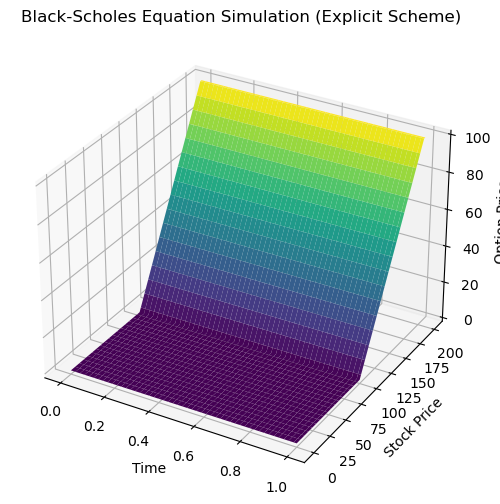

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
S_max = 200  # Maximum stock price
N = 100  # Number of steps in stock price
M = 1000  # Number of steps in time
r = 0.05  # Risk-free rate
T = 1.0  # Time to expiration
K = 100  # Strike price
sigma = 0.2  # Volatility

# Discretization steps
ds = S_max / N
dt = T / M

# Initial conditions for European Call Option
stock_prices = np.linspace(0, S_max, N+1)
option_prices = np.maximum(stock_prices - K, 0)

# Iterating through time steps using explicit finite difference method
for j in range(0, M):
    for i in range(1, N):
        option_prices[i] = option_prices[i] + \
                           dt * (0.5 * sigma**2 * (i*ds)**2 * option_prices[i+1]
                                 - (r*i*ds) * option_prices[i] +
                                 0.5 * r * option_prices[i]) / ((i*ds)**2)

# Plotting 3D surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(np.linspace(0, T, M+1), np.linspace(0, S_max, N+1))
ax.plot_surface(X, Y, option_prices.reshape((N+1, 1)).dot(np.ones((1, M+1))), cmap='viridis')

ax.set_xlabel('Time')
ax.set_ylabel('Stock Price')
ax.set_zlabel('Option Price')
ax.set_title('Black-Scholes Equation Simulation (Explicit Scheme)')

plt.show()


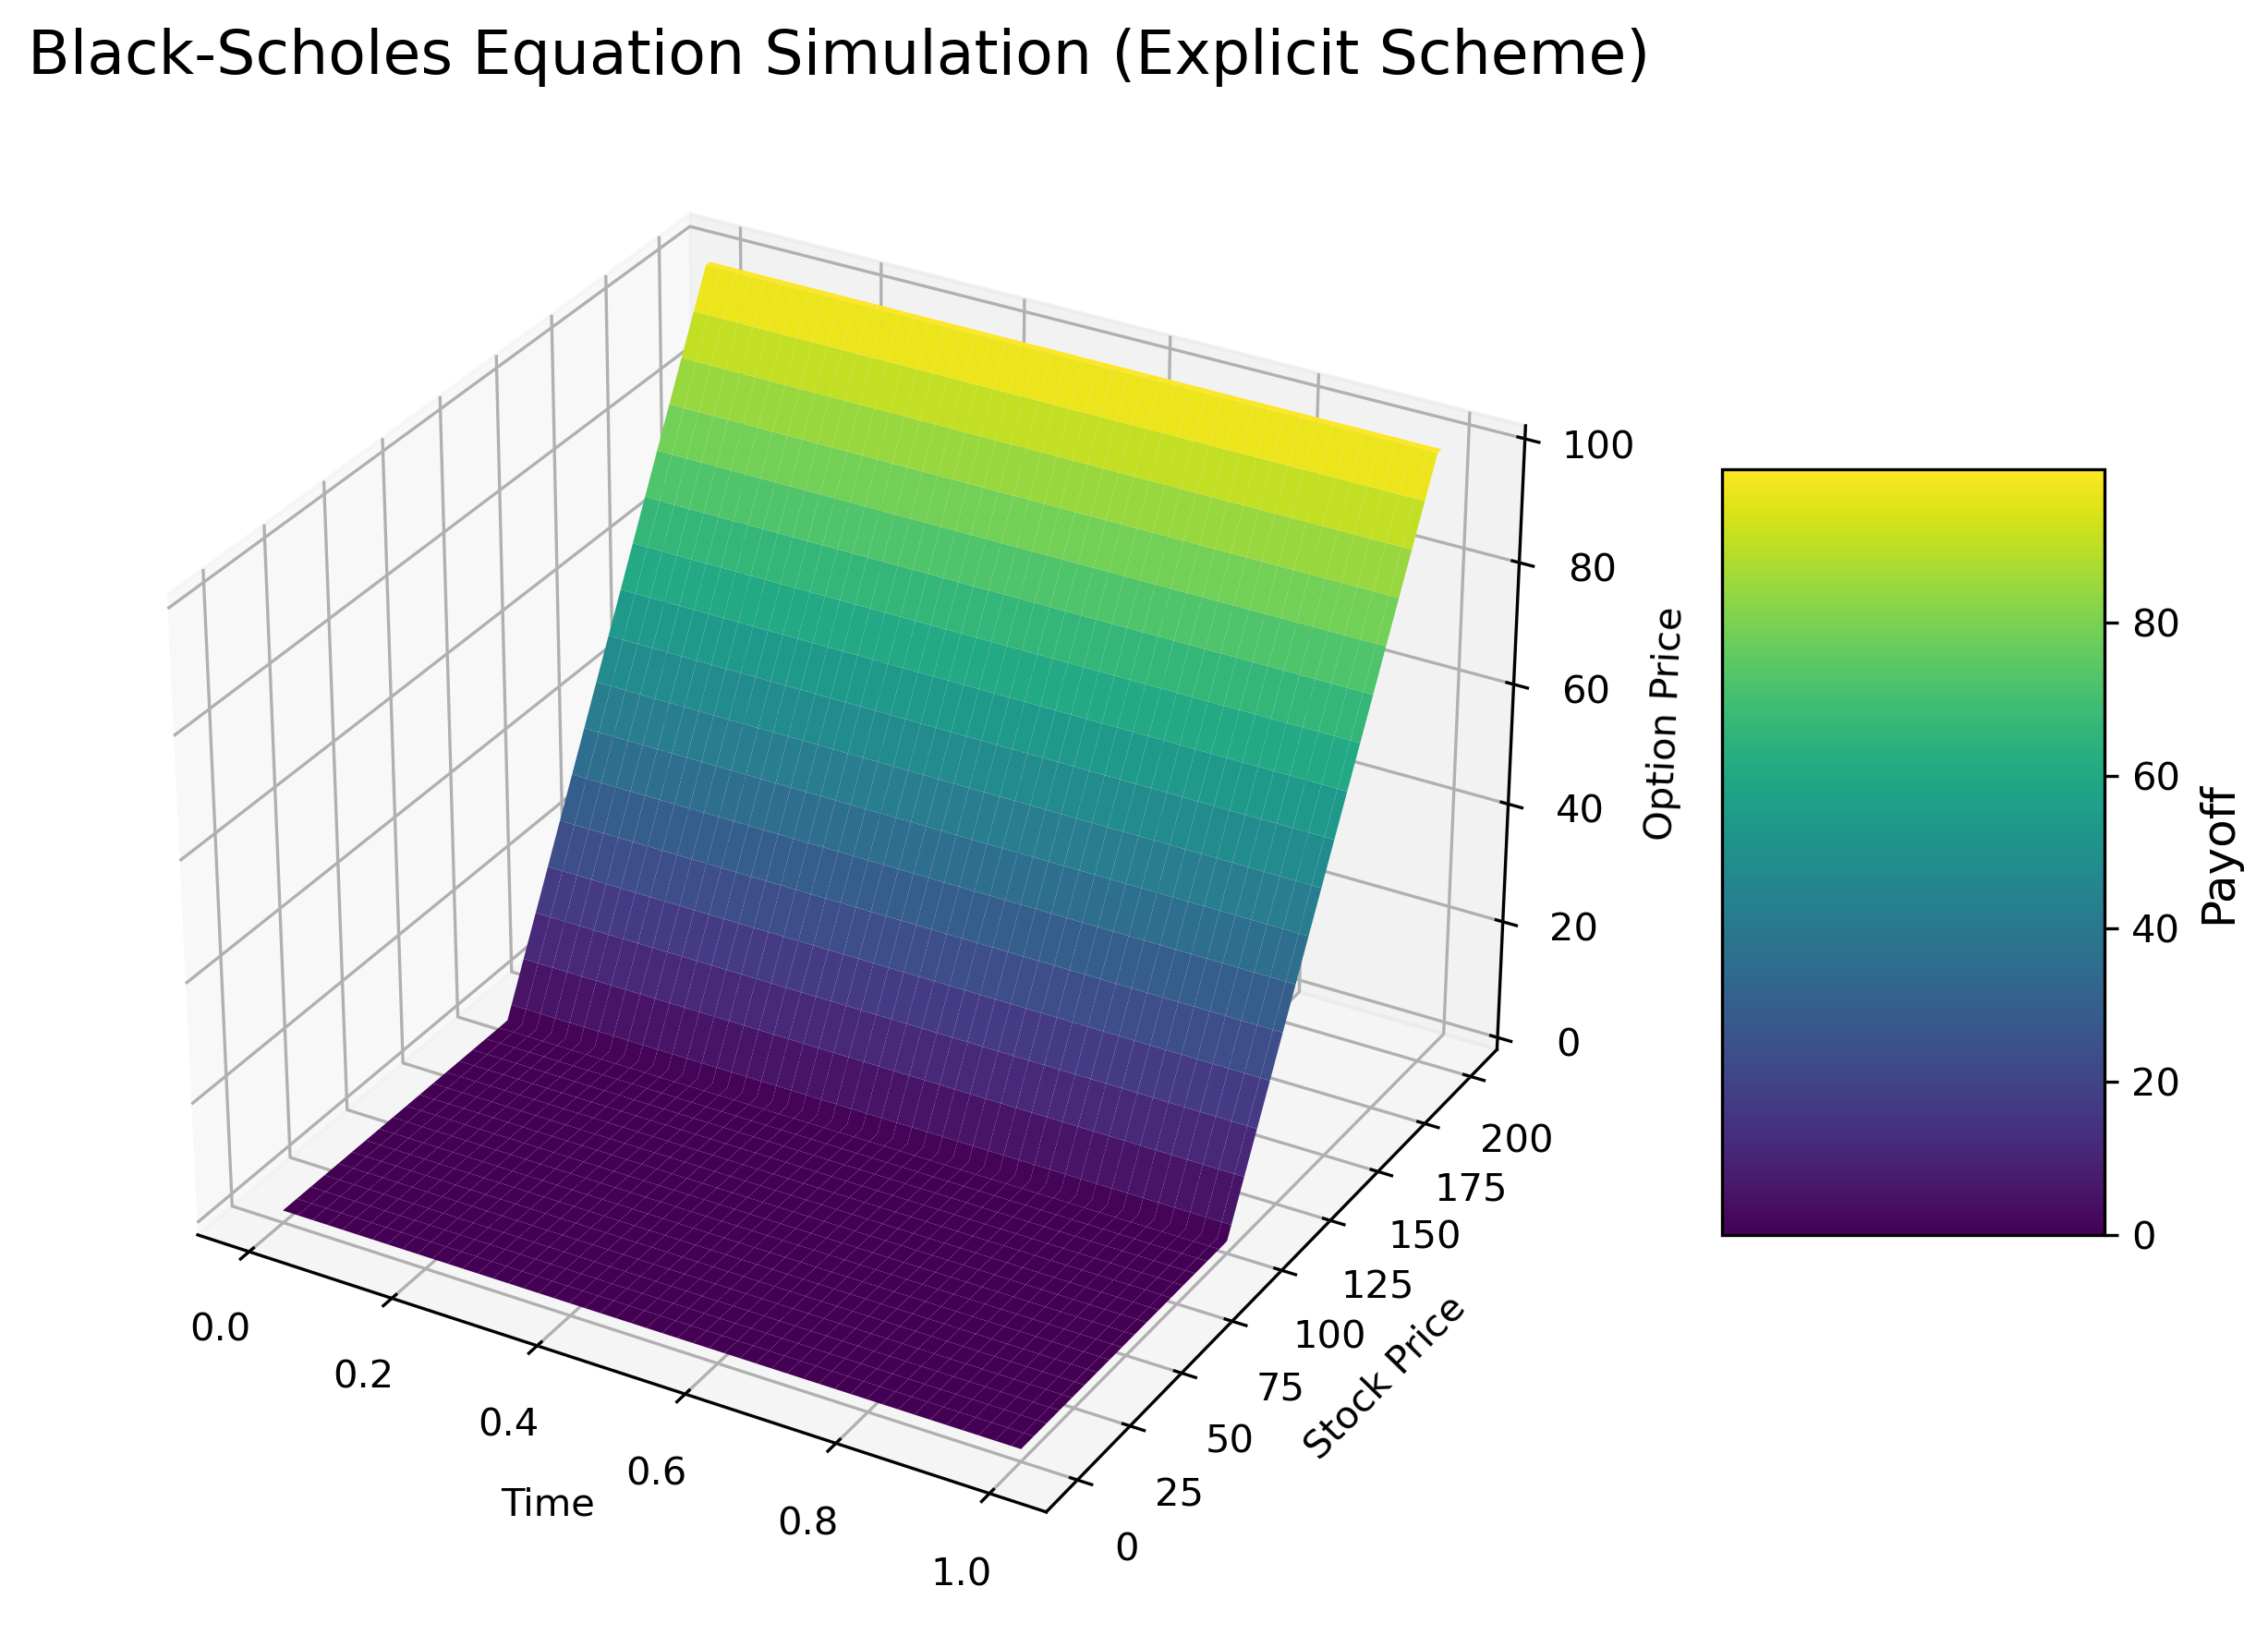

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
S_max = 200  # Maximum stock price
N = 100  # Number of steps in stock price
M = 1000  # Number of steps in time
r = 0.05  # Risk-free rate
T = 1.0  # Time to expiration
K = 100  # Strike price
sigma = 0.2  # Volatility

# Discretization steps
ds = S_max / N
dt = T / M

# Initial conditions for European Call Option
stock_prices = np.linspace(0, S_max, N + 1)
payoff = np.maximum(stock_prices - K, 0)

# Iterating through time steps using explicit finite difference method
for j in range(0, M):
    for i in range(1, N):
        payoff[i] = payoff[i] + \
                           dt * (0.5 * sigma**2 * (i * ds)**2 * payoff[i + 1]
                                 - (r * i * ds) * payoff[i] +
                                 0.5 * r * payoff[i]) / ((i * ds)**2)

# Plotting 3D surface
fig = plt.figure(figsize=(10, 6), dpi=300)  # Increased figure size and resolution
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(np.linspace(0, T, M + 1), np.linspace(0, S_max, N + 1))
surf = ax.plot_surface(X, Y, payoff.reshape((N + 1, 1)).dot(np.ones((1, M + 1))), cmap='viridis')

# Customizing labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Stock Price')
ax.set_zlabel('Option Price')
ax.set_title('Black-Scholes Equation Simulation (Explicit Scheme)', fontsize=16)

# Adding color bar
cbar = fig.colorbar(surf, aspect=2)
cbar.set_label('Payoff', fontsize=12)

# Adjusting tick parameters for better readability
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='z', labelsize=10)

# Show plot
plt.tight_layout()
plt.savefig('black_scholes_plot.png', dpi=300, bbox_inches='tight')  # Save plot as image with higher resolution
plt.show()


In [16]:
import multiprocessing as mp